In [9]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
from preprocessing import Preprocessing
import numpy as np
import tfidf
from kneed import KneeLocator
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
prp = Preprocessing()
df = prp.main()
df = Preprocessing.preprocess(df)
df = df['text']
ntf = tfidf.TFIDF(df)
X = ntf.df_tfidf_vectorize(df)

starting preprocessing...
...preprocessing completed
starting vectorizing words...
...words vectorized


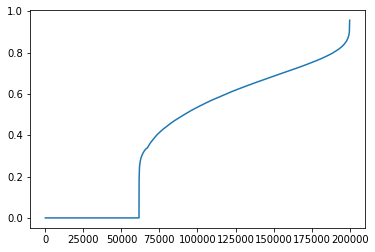

In [11]:
neigh = NearestNeighbors(n_neighbors=200).fit(X)
distances, indices = neigh.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

0.8017290712404327


<Figure size 360x360 with 0 Axes>

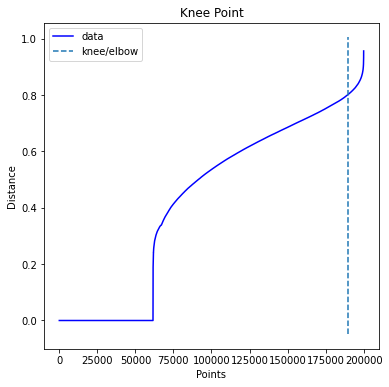

In [12]:
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(distances[knee.knee])

In [13]:
min_sample_list=np.arange(start=100, stop=900, step=100)
silhouette_scores_data=pd.DataFrame()
for min_sample_trial in min_sample_list:
    db = DBSCAN(eps=0.80, min_samples=min_sample_trial)
    if len(np.unique(db.fit_predict(X))):
        sil_score=silhouette_score(X, db.fit_predict(X))
    else:
        continue
    trial_parameters=" min_sample :" + str(min_sample_trial)
    silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

/tmp/ipykernel_127056/3886485789.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
/tmp/ipykernel_127056/3886485789.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
/tmp/ipykernel_127056/3886485789.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
/tmp/ipykernel_127056/3886485789.py:10: FutureWarning: The frame

,score,parameters
0,-0.203904,min_sample :800


In [15]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=100)
vectoriser.fit_transform(df)
DBS_clf = DBSCAN(eps=0.80, min_samples=800)
DBS_clf.fit(X)

DBSCAN(eps=0.8, min_samples=800)

In [17]:
print(DBS_clf.labels_)
labels=DBS_clf.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(DBS_clf.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

[-1 -1 -1 ... -1 -1  0]
Estimated no. of clusters: 6
Estimated no. of noise points: 132125


In [18]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, labels)
sil_score

-0.20390387028064955

In [22]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X.toarray(), labels)

4.660432584525518